In [1]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#Reading whole file using pandas
df = pd.read_csv('creditcard.csv')

In [3]:
#Checking no. of rows and columns in data
print('{} rows * {} columns.'.format(df.shape[0], df.shape[1]))


284807 rows * 31 columns.


In [4]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
65533,51629.0,1.078350,0.515282,0.503573,2.672034,-0.201344,-0.085618,-0.315537,0.208464,-0.280452,...,0.051468,0.071345,-0.020125,-0.089100,0.270341,0.092419,0.033397,0.056244,20.00,0
88562,62193.0,0.757596,-0.335594,1.326833,2.687858,-0.510012,1.516715,-0.655044,0.600095,0.025886,...,-0.027899,-0.123331,0.013846,-0.308879,0.081067,-0.059870,0.046490,0.036343,120.00,0
156344,107916.0,1.987452,-0.558211,-1.620850,-0.761364,1.832678,3.762217,-1.226120,0.934941,2.453557,...,-0.345413,-0.717651,0.438415,0.615261,-0.487186,-0.302007,0.001863,-0.048712,7.99,0
120550,75865.0,0.331239,-1.659822,1.602925,2.065773,-1.741086,1.247824,-0.853726,0.440315,1.853714,...,0.329004,0.689107,-0.446156,0.163984,0.371987,-0.107787,0.069910,0.101250,372.00,0
261401,159996.0,1.604618,-0.942094,-1.828214,-0.906154,0.592715,0.592741,0.242649,0.052819,1.419834,...,-0.014288,-0.057499,0.149091,-0.343167,-0.104666,-1.153645,0.063952,-0.017081,187.25,0
127074,78200.0,-1.054266,0.959219,1.162024,-0.427434,-0.436597,-0.800923,0.175119,0.410271,0.280018,...,0.020563,0.171185,-0.173801,0.453458,-0.113809,0.490114,0.075058,0.101610,1.00,0
188875,128171.0,-1.397596,0.518986,1.743178,-0.285403,-1.218557,0.204609,0.455112,0.580430,0.218665,...,0.159317,0.208948,0.149521,-0.115119,0.497864,-0.204712,0.152499,0.090935,195.34,0
25234,33535.0,-0.823397,0.591130,-0.124205,-2.243294,1.847679,3.780725,-0.793213,-1.056041,-1.183021,...,1.525439,-0.738471,0.107801,0.965623,-0.261825,-0.421274,-0.357045,-0.078430,14.95,0
273777,165694.0,-4.135056,-2.181150,-2.751518,-0.129613,0.664468,-1.127057,1.946196,0.211404,-0.455488,...,-0.110262,0.316386,1.007853,0.408791,-0.044469,0.103458,0.569575,-1.269349,241.00,0
43544,41551.0,1.080280,-0.428016,0.736208,0.045627,-0.939859,-0.230093,-0.591550,0.237853,0.423516,...,0.176744,0.365383,0.007367,0.270679,0.031899,1.071125,-0.066770,0.002777,47.85,0


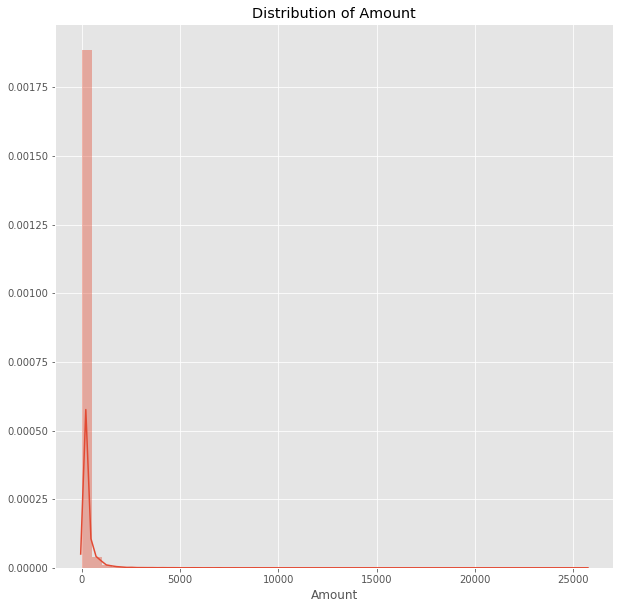

In [5]:
#Observing the nature of Amount feature using Seaborn
plt.figure(figsize=(10,10))
plt.title('Distribution of Amount')
sns.distplot(df.Amount)

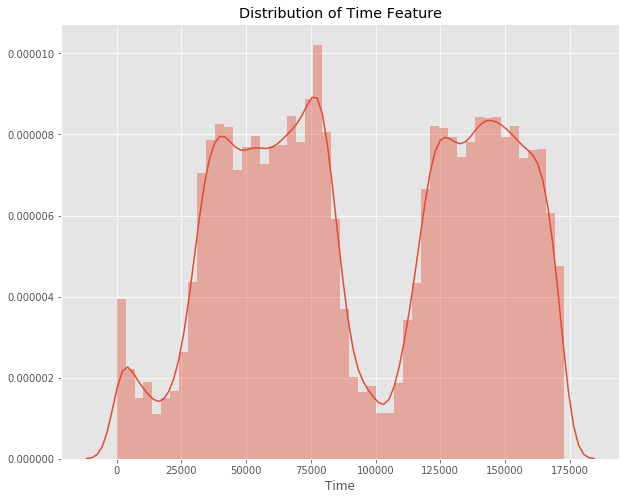

In [6]:
#Observing the nature of Time feature using Seaborn
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

In [7]:
#Note that as we are interested in detecting no. of fraudulent transactions so considering fraudulent transactions 
#as positive class(class=1) and non fraudulent transactions as negative class(class=0)

#Counting total no. of transactions
total_counts = df.Class.value_counts()
#Counting no. of fraudulent transactions
fraudulent = total_counts[1]
#Counting no. of non-fraudulent transactions
non_fraudulent = total_counts[0]
total_transactions = (non_fraudulent+fraudulent)
#Now calculating probabilities of fraudulent and non-fraudulent transactions
prob_of_fraudulent = (fraudulent/total_transactions)*100
prob_of_non_fraudulent = (non_fraudulent/total_transactions)*100
print('There are {} total transactions out of which {} are non-fraudulent transactions ({:.3f}%) and {} are fraudulent transactions ({:.3f}%).'.format(total_transactions,non_fraudulent, prob_of_non_fraudulent, fraudulent, prob_of_fraudulent))

There are 284807 total transactions out of which 284315 are non-fraudulent transactions (99.827%) and 492 are fraudulent transactions (0.173%).


Text(0, 0.5, 'Counts')

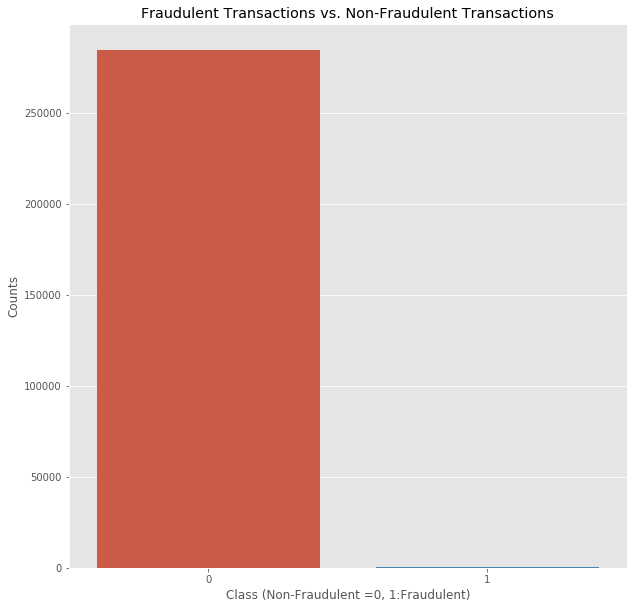

In [8]:
#Now plotting this dataset on bar plot using Seaborn
plt.figure(figsize=(10,10))
sns.barplot(x = total_counts.index, y = total_counts)
plt.title('Fraudulent Transactions vs. Non-Fraudulent Transactions')
plt.xlabel('Class (Non-Fraudulent =0, 1:Fraudulent)')
plt.ylabel('Counts')

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
#scaling Time feature

scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]    # making a flat list out of a list of lists
scaled_time = pd.Series(flat_list1)

In [11]:
#scaling Amount feature

scaled_amount = scaler.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [12]:
# adding the scaled features and dropping the unscaled features from the original dataframe

df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.drop(['Amount', 'Time'], axis=1, inplace=True)
df.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
13336,1.315983,0.460442,-0.459869,0.930951,0.653414,-0.175502,0.270173,-0.161819,0.967259,-0.127821,...,-0.299143,-0.280336,-0.903279,0.923271,-0.277105,-0.046359,-0.019231,0,-0.341275,-1.501174
45282,-0.892245,-0.194921,2.059868,-0.526081,-0.812165,0.513956,0.437796,0.232590,-1.444670,-0.027370,...,0.427636,0.160271,0.202700,0.053450,-0.393510,0.114932,0.127419,0,0.278468,-1.106275
38138,-7.030877,-6.900315,1.299860,2.013413,4.440896,-3.441021,-0.534965,0.054237,-0.031779,-0.364535,...,0.880151,5.933406,0.258822,2.128147,-0.140469,0.865303,-0.673353,0,-0.150247,-1.169765
116967,1.257289,0.491068,-0.215395,0.907986,0.314816,-0.665224,0.488766,-0.226442,-0.619474,0.194683,...,0.174550,-0.206610,0.042931,0.889365,-0.295862,-0.007748,-0.001044,0,-0.346073,-0.427915
114425,1.422786,-1.152772,0.790577,-1.291188,-1.823652,-0.663867,-1.239406,0.023723,-1.544416,1.409613,...,-0.659961,0.261491,0.314750,-0.036715,-0.396648,0.049127,0.027759,0,-0.274867,-0.449331
139493,1.258009,0.375776,0.312433,0.690366,-0.347966,-1.067503,0.103292,-0.218365,-0.006645,-0.289907,...,-0.808252,0.126968,0.352421,0.225128,0.093620,-0.021229,0.031242,0,-0.349271,-0.245006
209463,1.981605,-0.089905,-1.076819,1.673498,0.070338,-0.338125,-0.126618,-0.016724,-0.772705,1.444194,...,0.372539,0.121801,-0.322527,-0.435645,2.390780,-0.228615,-0.100002,0,-0.262393,0.900292
108107,0.162269,-2.262317,-1.026627,-0.976972,-1.065291,-0.826751,0.805429,-0.274880,1.175666,-1.154661,...,-0.249889,-0.731434,0.066255,0.566779,0.039626,-0.139759,0.089471,0,2.057856,-0.506356
236582,-1.202317,0.256849,-1.934849,-0.048329,0.667253,-0.815419,0.721212,-0.034694,0.545270,-0.506430,...,0.751847,0.411067,-1.164512,-0.049099,-0.107756,-0.730906,0.291869,0,-0.029384,1.138310
180595,0.034968,0.352041,0.809076,-0.387579,-0.065151,0.581573,0.019477,0.209128,0.818418,-0.364707,...,0.446009,0.167874,0.017371,-1.581067,0.040943,0.165317,0.268761,0,-0.173915,0.627445
